# Mentoría

## Aprendizaje Supervisado

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto práctico del proyecto, correspondiente a la materia Aprendizaje Automático Supervisado. El objetivo consiste en profundizar en la aplicación de métodos de aprendizaje supervisado aprendidos en el curso, así como también en métodos de ensemble learning. Esto, siempre a través de experimentos reproducibles y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

A los fines de este práctico, consideraremos el problema original de nuestro proyecto, el cual consiste en un problema de regresión. Nuevamente, al igual que en el práctico anterior, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

## Consigna para Aprendizaje Automático Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset energia_completo. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos, prácticamente iguales a los del práctico anterior.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.
En esta etapa, nuevamente, pueden adicionar los atributos creados por ustedes que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Kwatts_3_fases`.

#### 3. Análisis del Balance de Clases

¿Cómo luce el balance de clases? ¿Tomarán alguna decisión al respecto?


#### 4. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización, considerando los nuevos modelos propuestos?

Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 5. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.


### II. Aplicación de Modelos de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de regresión **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando distintos kernels para la regresión.
2. Random Forest, utilizando parámetros de normalización cuando lo crean pertinente.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Finalmente, **combinar los modelos en un clasificador por votos** (pueden implementar VotingClassifier, del módulo de ensemble).

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
   + Mean Absolute Error (MAE)
   + Mean Squared Error (MSE)
   + R2 Score
   + Explaned Variance Score
   
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
   
- ¿Cuál consideran la métrica más apropiada para utilizar en nuestros modelos? ¿Por qué?

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# RESOLUCIÓN

## Importaciones

In [ ]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl
from prettytable import PrettyTable

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

from sklearn import ensemble
from sklearn import svm
from sklearn.svm import LinearSVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor



np.random.seed(0)  # Para mayor determinismo

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from math import sqrt
from numpy import concatenate



In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## I. Preprocesamiento

In [ ]:
################### I. Preprocesamiento

### 1. Obtención del Dataset
### 2. Aplicar Script de Curación

# Si estamos en Colab se debe descargar el script porque es borrado cada vez que el entorno se desconecta.
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  !wget https://raw.githubusercontent.com/leorebola/diplodatos/master/practicos/TP3/curacion_dataset.py

# Importamos el script de curación
from curacion_dataset import get_ds

# URLs de los datsets
ENERGIA_DS_URL = 'https://raw.githubusercontent.com/alaain04/diplodatos/master/data/energia_completo.csv'
CLIMA_DS_URL = 'https://raw.githubusercontent.com/alaain04/diplodatos/master/data/clima_posadas_20192020.csv'

--2020-12-01 02:11:06--  https://raw.githubusercontent.com/leorebola/diplodatos/master/practicos/TP3/curacion_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16774 (16K) [text/plain]
Saving to: ‘curacion_dataset.py’

curacion_dataset.py 100%[===================>]  16.38K  --.-KB/s    in 0s      

2020-12-01 02:11:06 (103 MB/s) - ‘curacion_dataset.py’ saved [16774/16774]



In [ ]:
# Ejecutamos el script de curacion
ds = get_ds(ENERGIA_DS_URL, CLIMA_DS_URL)
ds.columns = ['fecha', 'ta','sa','ra','vab','vca','vbc','kwatts','potencia', 'temperature', 'windspeed']

# dia de la semana
# ds['hour'] = ds.fecha.apply(lambda x: x[11:13])
ds['hours'] = ds['fecha'].dt.hour
ds['day_of_week'] = ds.fecha.apply(lambda x: x.strftime('%A'))
ds['month'] = ds.fecha.apply(lambda x: x.strftime('%B'))

print('---------------------------------')
print('Se eliminaron {} filas con Kwatts 3 fases en Null'.format(ds.kwatts.isnull().sum()))

2020-12-01 02:11:08 Tipo de dato no esperado para: Amper fase T-A -> int64
2020-12-01 02:11:08 Tipo de dato no esperado para: Amper fase S-A -> int64
2020-12-01 02:11:08 Tipo de dato no esperado para: Amper fase R-A -> int64
2020-12-01 02:11:08 Dataset Clima importado correctamente
2020-12-01 02:11:08 Verificacion de Fecha y Hora únicas: OK
2020-12-01 02:11:08 Resumen de valores nulos para dataset Clima
2020-12-01 02:11:08 Cantidad de valores nulos en la columna: time__________________________ 0_________ 0.0%
2020-12-01 02:11:08 Cantidad de valores nulos en la columna: temperature___________________ 0_________ 0.0%
2020-12-01 02:11:08 Cantidad de valores nulos en la columna: windspeed_____________________ 1_________ 0.01%

2020-12-01 02:11:08 Resumen de valores nulos para dataset Energia
2020-12-01 02:11:08 Cantidad de valores nulos en la columna: Amper fase T-A________________ 0_________ 0.0%
2020-12-01 02:11:08 Cantidad de valores nulos en la columna: Amper fase S-A________________ 0

In [ ]:
ds.index = pd.PeriodIndex(list(ds['fecha']), freq='T')
ds = ds.sort_index()

ds_pp = ds[(ds.fecha > '2020-01-21 23:59:59')] # eliminamos datos de diciembre y parte de enero por su gran porcentaje de errores
ds_pp = ds_pp[['fecha','kwatts','temperature','windspeed','hours','day_of_week']] # elegimos el target como kwatts (potencia) y los features temperatura, velocidad del viento, hora y día de semana
ds_pp.pop('fecha')
ds_pp.kwatts = ds_pp.kwatts.fillna(0)
# dataset pre-procesado
ds_pp = ds_pp.tail(12*24*21) # redujo el dataset para reducir los tiempos

# Encoding de las variables de categóricas hours y day_of_week
ds_pp = pd.get_dummies(ds_pp, columns=["day_of_week"], drop_first=True)
ds_pp = pd.get_dummies(ds_pp, columns=["hours"], drop_first=True)

In [ ]:
# convertir series temporales a problema de aprendizaje supervisado

# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
# https://machinelearningmastery.com/time-series-forecasting-supervised-learning/
# https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/
# https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

# definimos función para crear los t_in lags y t_out forecast
def create_lags(df, n_in=1, n_out=1, dropnan=True):
  cols = df.columns
  ds_sup = df.copy()
  for i in range(n_in,0,-1):
    for j in range(len(cols)):
      ds_sup['var%d_t-%d' % (j+1,i)] = ds_sup[cols[j]].shift(i)

  for i in range(n_out+1):
    if i == 0:
      for j in range(len(cols)):
        ds_sup['var%d_t' % (j+1)] = ds_sup[cols[j]].shift(-i)
    else:
      for j in range(len(cols)):
        ds_sup['var%d_t+%d' % (j+1,i)] = ds_sup[cols[j]].shift(-i)
  if dropnan:
    ds_sup.dropna(inplace = True)
  return ds_sup


# defino función para convertir una serie temporal en problema de ApSup

def ts2sup(data,t_in,t_out):
  # transformar todos los datos como float32
  data = data.astype('float32')
  data_sup = create_lags(data,t_in,t_out) # variables de entrada: dataset, tiempos anteriores, tiempos de predicciones

  # quitamos las columnas que no queremos predecir
  cols2drop = list()
  for i in range(2,33):
    for j in range(1,t_out+1):
      cols2drop.append('var%d_t+%d' % (i,j))

  data_sup.drop(data_sup.columns[list(range(32))], axis=1, inplace=True)
  data_sup.drop(cols2drop, axis=1, inplace=True)
  return data_sup



In [ ]:
# función para gráficos
def plot_forecasts(y_test, y_pred, t_out):
  # grafico el conjunto test en azul
  # grafico las predicciones en verde en caso de realizar una única predicción
  # o en verde y magenta en caso de intervalos de predicción
  if t_out > 1:
    # grafico el conjunto de test en azul
    y_test_plot = y_test[[range(0,len(y_test),t_out)],:]
    y_test_plot = y_test_plot.reshape(y_test_plot.shape[1]*y_test_plot.shape[2])

    y_pred_plot = y_pred[[range(0,len(y_pred),t_out)],:]
    y_pred_plot = y_pred_plot.reshape(y_pred_plot.shape[1]*y_pred_plot.shape[2])

    plt.figure(figsize=(30,10))
    plt.plot(y_test_plot)
    x_e = 0

    for i in range(y_pred.shape[0]//t_out):
      plt.plot()
      x_s = x_e
      x_e = x_s + t_out
      xaxis = [x for x in range(x_s,x_e)]
      yaxis = y_pred_plot[xaxis]
      if i % 2 == 0:
        plt.plot(xaxis,yaxis,'g')
      else:
        plt.plot(xaxis,yaxis,'m')
    pyplot.show()
  else:
    plt.figure(figsize=(30,10))
    plt.plot(y_test,'b')
    plt.plot(y_pred,'g')
    pyplot.show()

## II. Serie temporal a supervisado para una predicción y división de datos en conjuntos train-test 

In [ ]:
# nuevo dataset para supervizado 

# target = var1 (kwatts), features = var2, var3, var4, var5 ('temperature','windspeed','hours','day_of_week')
t_in = 12 # 12 mediciones por hora, entreno con t_in observaciones anteriores
t_out = 1 # predicciones a futuro, t_out medicioens

ds_sup = ts2sup(ds_pp,t_in,t_out)

In [ ]:
ds_sup

,var1_t-12,var2_t-12,var3_t-12,var4_t-12,var5_t-12,var6_t-12,var7_t-12,var8_t-12,var9_t-12,var10_t-12,var11_t-12,var12_t-12,var13_t-12,var14_t-12,var15_t-12,var16_t-12,var17_t-12,var18_t-12,var19_t-12,var20_t-12,var21_t-12,var22_t-12,var23_t-12,var24_t-12,var25_t-12,var26_t-12,var27_t-12,var28_t-12,var29_t-12,var30_t-12,var31_t-12,var32_t-12,var1_t-11,var2_t-11,var3_t-11,var4_t-11,var5_t-11,var6_t-11,var7_t-11,var8_t-11,var9_t-11,var10_t-11,var11_t-11,var12_t-11,var13_t-11,var14_t-11,var15_t-11,var16_t-11,var17_t-11,var18_t-11,var19_t-11,var20_t-11,var21_t-11,var22_t-11,var23_t-11,var24_t-11,var25_t-11,var26_t-11,var27_t-11,var28_t-11,var29_t-11,var30_t-11,var31_t-11,var32_t-11,var1_t-10,var2_t-10,var3_t-10,var4_t-10,var5_t-10,var6_t-10,var7_t-10,var8_t-10,var9_t-10,var10_t-10,var11_t-10,...,var23_t-2,var24_t-2,var25_t-2,var26_t-2,var27_t-2,var28_t-2,var29_t-2,var30_t-2,var31_t-2,var32_t-2,var1_t-1,var2_t-1,var3_t-1,var4_t-1,var5_t-1,var6_t-1,var7_t-1,var8_t-1,var9_t-1,var10_t-1,var11_t-1,var12_t-1,var13_t-1,var14_t-1,var15_t-1,var16_t-1,var17_t-1,var18_t-1,var19_t-1,var20_t-1,var21_t-1,var22_t-1,var23_t-1,var24_t-1,var25_t-1,var26_t-1,var27_t-1,var28_t-1,var29_t-1,var30_t-1,var31_t-1,var32_t-1,var1_t,var2_t,var3_t,var4_t,var5_t,var6_t,var7_t,var8_t,var9_t,var10_t,var11_t,var12_t,var13_t,var14_t,var15_t,var16_t,var17_t,var18_t,var19_t,var20_t,var21_t,var22_t,var23_t,var24_t,var25_t,var26_t,var27_t,var28_t,var29_t,var30_t,var31_t,var32_t,var1_t+1
2020-07-12 19:30,4126.00,22.00,8.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4219.00,22.00,8.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4097.00,22.00,8.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3925.00,22.00,8.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3924.00,22.00,8.11,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3894.00
2020-07-12 19:35,4219.00,22.00,8.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4097.00,22.00,8.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4015.00,22.00,8.69,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3924.00,22.00,8.11,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3894.00,22.00,7.87,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3956.00
2020-07-12 19:40,4097.00,22.00,8.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,4015.00,22.00,8.69,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,3955.00,22.00,8.85,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3894.00,22.00,7.87,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3956.00,22.00,7.65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3873.00
2020-07-12 19:45,4015.00,22.00,8.69,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [ ]:
# Estandarizamos los datos en función del conjunto de entrenamiento

# División en datos de entrenamiento y validación con 80% y 20% respectivamente
values = ds_sup.values
n_train_hours = int(len(ds_sup) * .8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# Separamos features y target
X_train, y_train = train[:, :-t_out], train[:, -t_out:]
X_test, y_test = test[:, :-t_out], test[:, -t_out:]

# Feature scaling (analizamos estandarizando o normalizando en (0,1))
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0, 1))

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

##III. Entrenamiento y predicción con distintos modelos (caso única predicción a futuro)
* a. Naive regressor
* b. SVR
* c. LineasSVR
* d. Random Forest
* e. MLPR


### Naive regressor

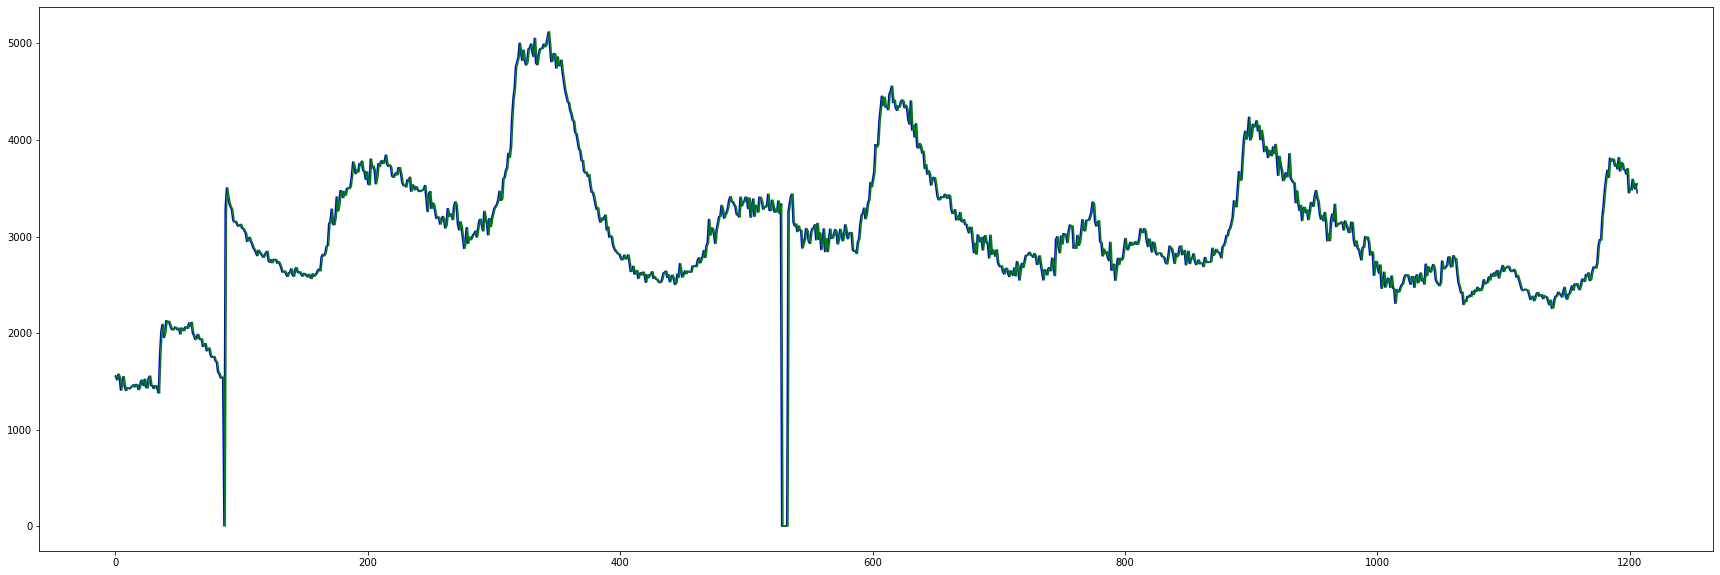

Test RMSE: 189.120
R2 score: 0.927


In [ ]:
# Defino como baseline un naive regressor que consiste en asignar a la predicción como el valor anterior
def naive_regressor(X,y,t_out):
    dimX1, dimX2 = X.shape[0], X.shape[1]
    dimy1, dimy2 = y.shape[0], y.shape[1]
    X_tr = scaler.inverse_transform(X)
    # ypred = np.array([])
    ynaive = X_tr[:,-32*t_out].reshape(dimy1,1)
    ypred = ynaive
    for i in range(1,dimy2):
        ypred = np.concatenate((ypred, ynaive), 1)
    return ypred

y_pred_naive = naive_regressor(X_test_sc,y_test,t_out)

from sklearn.metrics import mean_squared_error, r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred_naive))
r2sc = r2_score(y_test,y_pred_naive)
plot_forecasts(y_test,y_pred_naive,t_out)
print('Test RMSE: %.3f' % rmse)
print('R2 score: %.3f' % r2sc)

### Support Vector Regression

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

In [ ]:
# entrenamiento y predicción con parámetros default para SVR
svr = SVR()
svr.fit(X_train_sc, y_train)
# realizamos la predicción
y_pred_svr = svr.predict(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


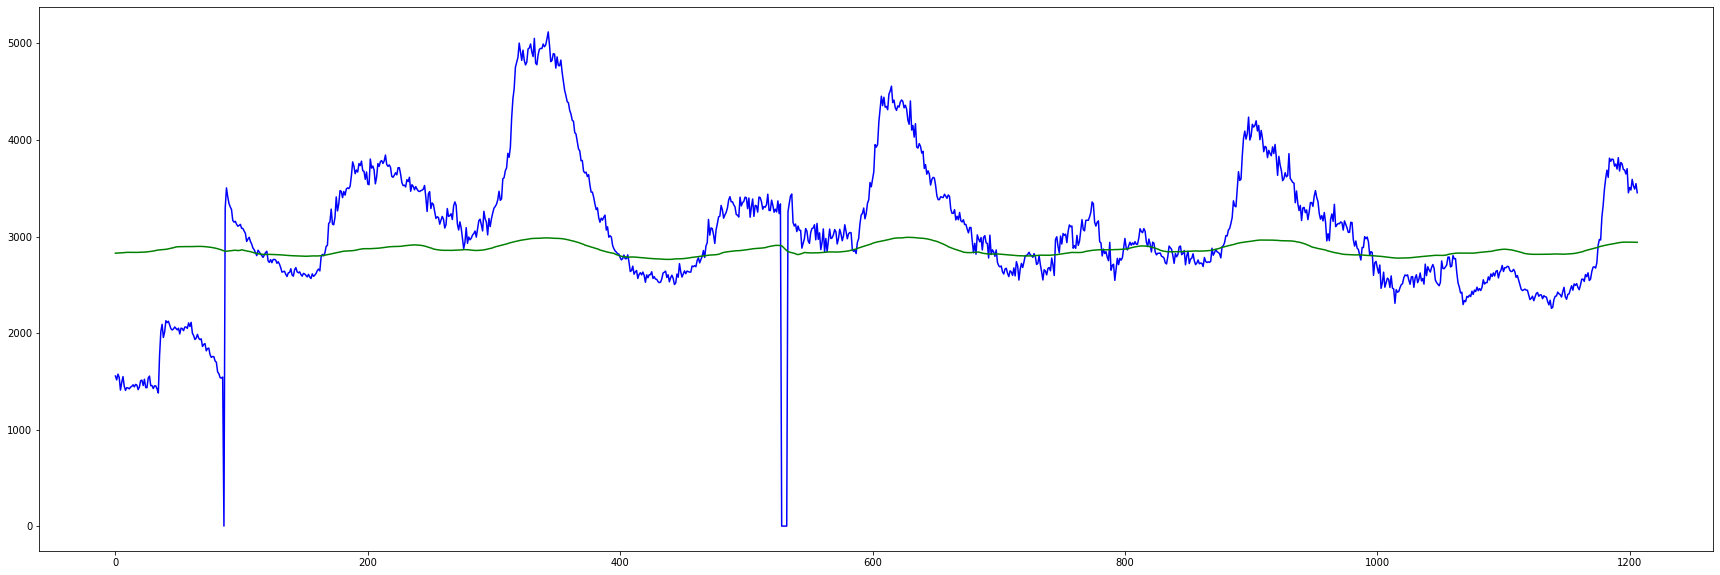

Test RMSE: 685.927
R^2 score: 0.043


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_svr))
plot_forecasts(y_test,y_pred_svr,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % svr.score(X_test_sc,y_test))

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

In [ ]:
from sklearn.svm import LinearSVR

# entrenamiento y predicción con parámetros default para SVR
lsvr = LinearSVR()
lsvr.fit(X_train_sc, y_train)
# realizamos la predicción
y_pred_lsvr = lsvr.predict(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


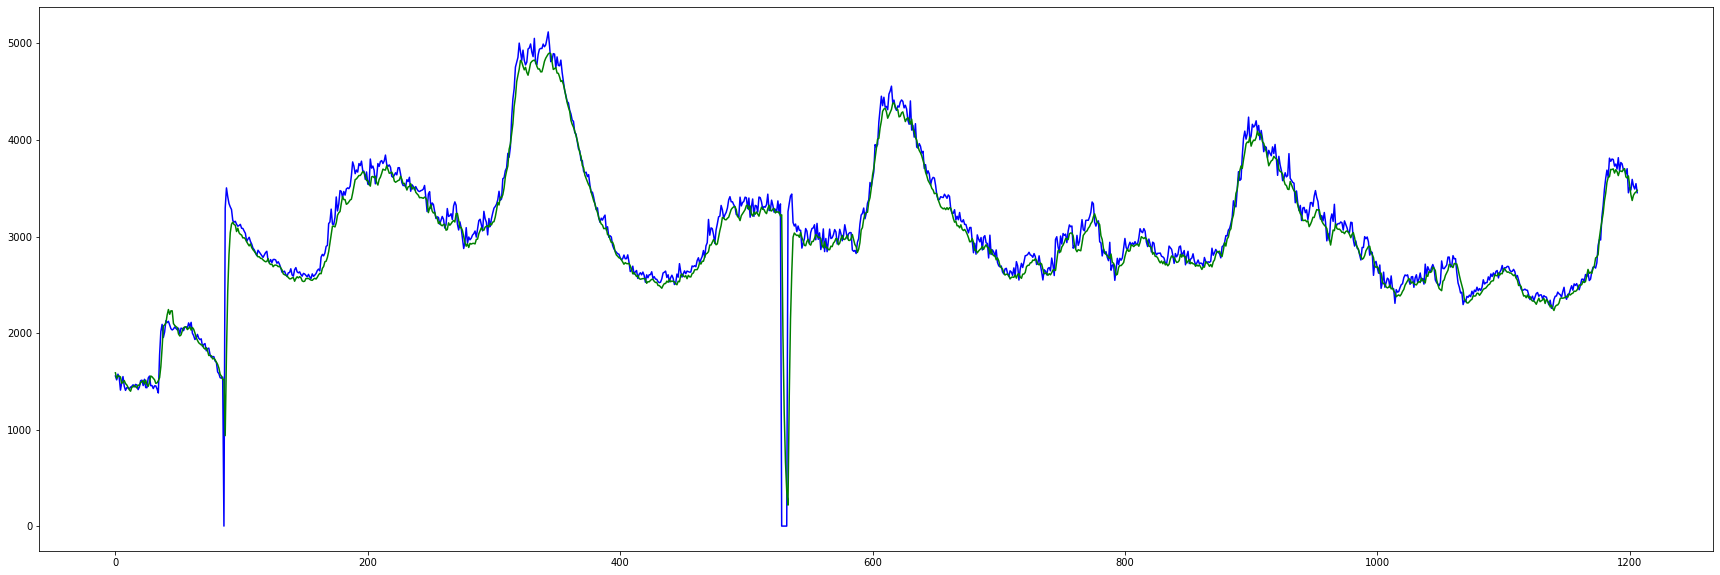

Test RMSE: 213.557
R^2 score: 0.907


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_lsvr))
plot_forecasts(y_test,y_pred_lsvr,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % lsvr.score(X_test_sc,y_test))

### Random Forest

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(max_depth=30, random_state=0)
rfr.fit(X_train_sc, y_train)

y_pred_rfor = rfr.predict(X_test_sc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


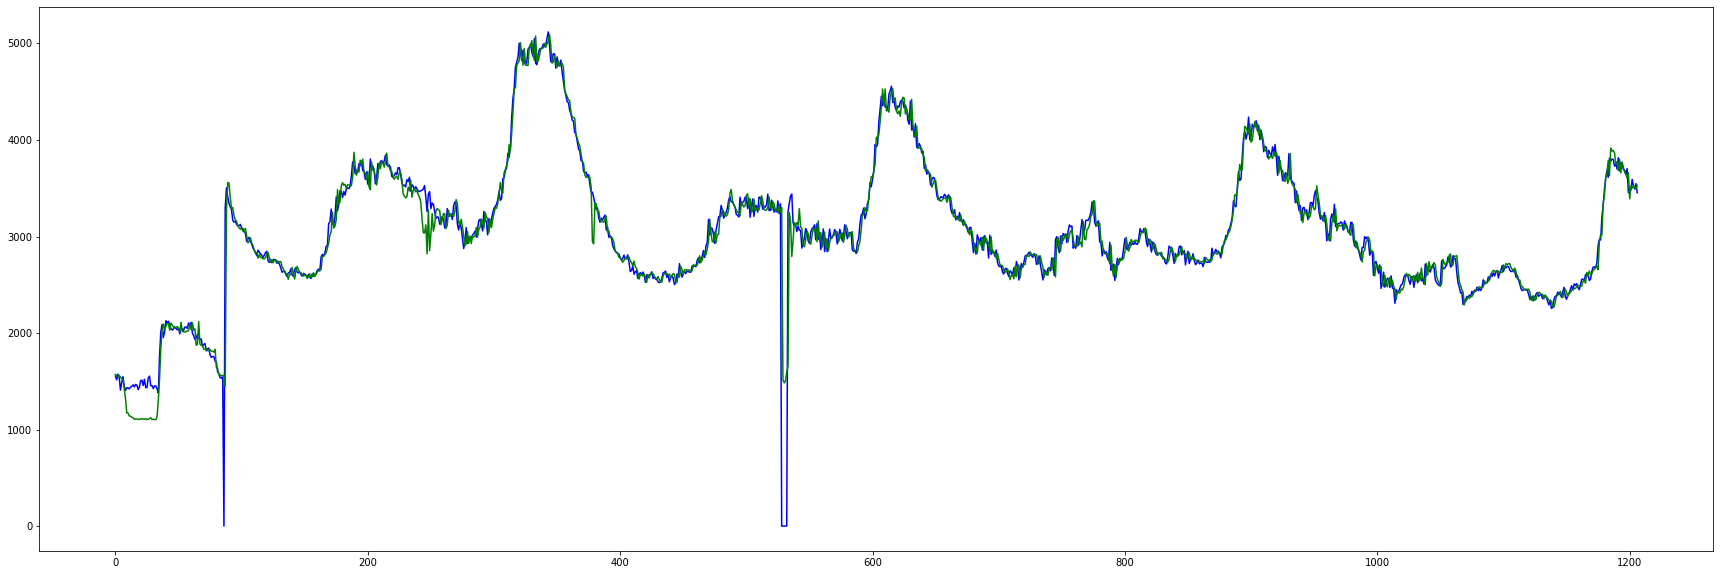

Test RMSE: 186.821
R^2 score: 0.929


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_rfor))
plot_forecasts(y_test,y_pred_rfor,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % rfr.score(X_test_sc,y_test))

### MLPR

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [ ]:
mlpr = MLPRegressor(random_state=0, max_iter = 10000).fit(X_train_sc, y_train)
y_pred_mlp = mlpr.predict(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


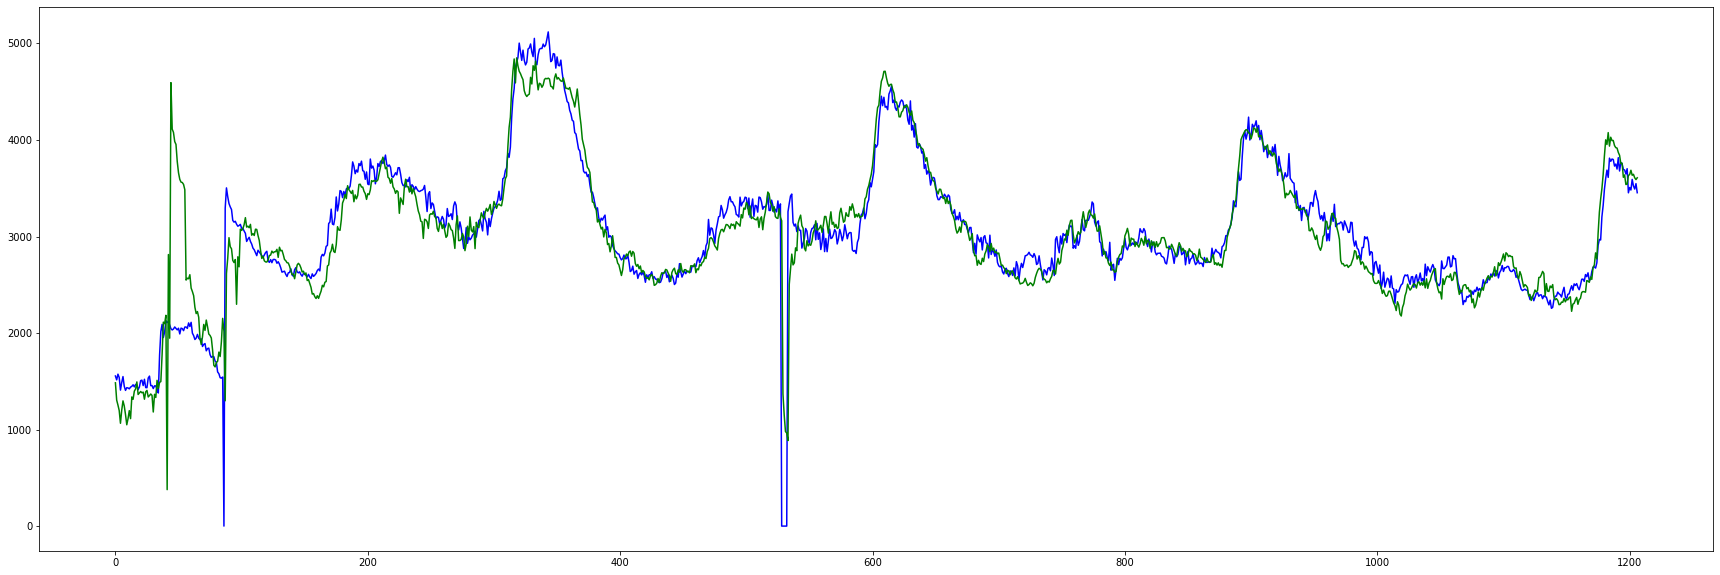

Test RMSE: 304.436
R^2 score: 0.812


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_mlp))
plot_forecasts(y_test,y_pred_mlp,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % mlpr.score(X_test_sc,y_test))

## IV. Análisis de metricas
* a. Mean Absolute Error (MAE)
* b. Mean Squared Error (MSE)
* c. R2 Score
* d. Explained Variance Score

In [ ]:
metrics_labels = ['MAE_train','MAE_test','MSE_train','MSE_test', 'R2_train','R2_test','EVS_train','EVS_test']
metrics = [mean_absolute_error,mean_squared_error,r2_score,explained_variance_score]
models_labels = ['NR','SVR','LSVR','RFR','MLPR']
models = ['naive',svr,lsvr,rfr,mlpr]

tmp = []
met_list = []
for mod in models:
    if mod == 'naive':
        yhat_test= naive_regressor(X_test_sc,y_test,t_out)
        yhat_train = naive_regressor(X_train_sc,y_train,t_out)
        for met in metrics:
            tmp.append(met(y_train,yhat_train))
            tmp.append(met(y_test,yhat_test))
        zipbObj = zip(metrics_labels, tmp)
        met_list.append(dict(zipbObj))
        tmp=[]
    else: 
        yhat_test = mod.predict(X_test_sc)
        yhat_train = mod.predict(X_train_sc)
        for met in metrics:
            tmp.append(met(y_train,yhat_train))
            tmp.append(met(y_test,yhat_test))
        zipbObj = zip(metrics_labels, tmp)
        met_list.append(dict(zipbObj))
        tmp=[]
metrics_dataframe = pd.DataFrame(met_list)
metrics_dataframe['Model'] = models_labels
metrics_dataframe.set_index('Model', inplace = True)


In [ ]:
print('Tabla comparativa entre métricas para los modelos propuestos:\n')
display(metrics_dataframe)

Tabla comparativa entre métricas para los modelos propuestos:



,MAE_train,MAE_test,MSE_train,MSE_test,R2_train,R2_test,EVS_train,EVS_test
Model,,,,,,,,
NR,61.38,69.85,26307.23,35766.41,0.95,0.93,0.95,0.93
SVR,503.64,485.71,507027.12,470495.48,0.10,0.04,0.14,0.10
LSVR,81.30,92.27,38088.33,45606.67,0.93,0.91,0.94,0.91
RFR,23.98,84.30,4513.59,34902.21,0.99,0.93,0.99,0.93
MLPR,29.41,167.02,3046.58,92681.47,0.99,0.81,0.99,0.81


Realizando la regresión mediante los distintos modelos podemos observar que para las condiciones dadas los mejores resultados se obtienen con los modelos 'Naive', 'Random Forest' y 'Multi Output Perceptron'.
Dado que estandarizamos los features para entrenamiento y no la variable target consideramos que es apropiado analizar las métricas R2 y EVS.
Se observa que en el caso de predecir una sola observación a futuro, ningún modelo presenta mejora significativa respecto a la predicción naive.

## V. MLPR ajustando hiperparámetros con GridSearchCV



Realizamos un GridSearchCV para entrenar la red neuronal MLPR para comparar.

In [ ]:
mlpr = MLPRegressor(max_iter=10000)

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list)

gridCV.fit(X_train_sc, y_train)
predicted = gridCV.predict(X_test_sc)
parameters = mlpr.get_params()

# Última realización llevó aproximadamente 5 horas

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

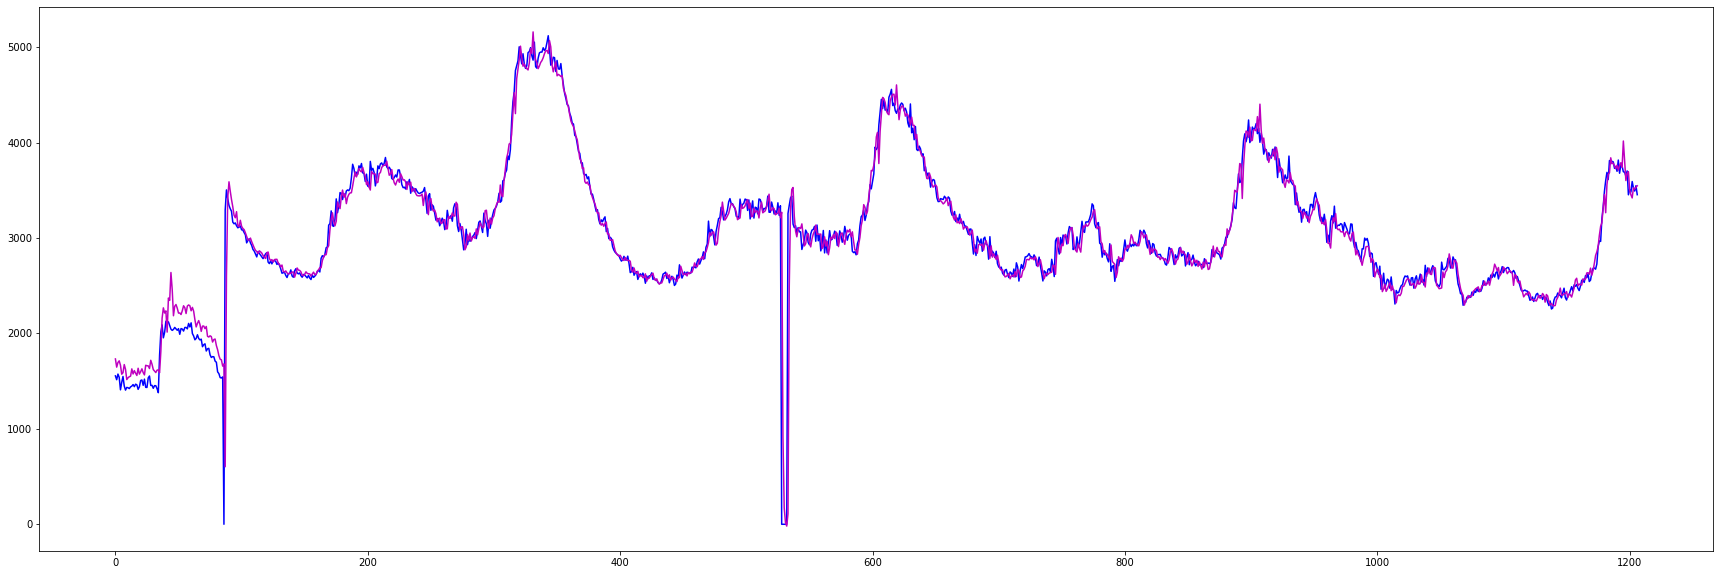

Test RMSE: 193.470
R^2 score: 0.924


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, predicted))
plot_forecasts(y_test,predicted,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % gridCV.score(X_test_sc,y_test))

In [ ]:
parameters

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 10000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Dado el póco incremento en el rendimiento de las métricas en contra del costo computacional de ajustar el modelo basado en red neuronal considero que no es apropiado para este problema para predecir una sola medición a futuro.

## VI. Serie temporal a supervisado para varias predicciones a futuro y división de datos en conjuntos train-test 

In [ ]:
# nuevo dataset para supervizado 

# target = var1 (kwatts), features = var2, var3, var4, var5 ('temperature','windspeed','hours','day_of_week')
t_in = 12 # 12 mediciones por hora, entreno con t_in observaciones anteriores
t_out = 6 # predicciones a futuro, t_out medicioens

ds_sup = ts2sup(ds_pp,t_in,t_out)

In [ ]:
# Estandarizamos los datos en función del conjunto de entrenamiento
# División en datos de entrenamiento y validación con 80% y 20% respectivamente
values = ds_sup.values
n_train_hours = int(len(ds_sup) * .8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# Separamos features y target
X_train, y_train = train[:, :-t_out], train[:, -t_out:]
X_test, y_test = test[:, :-t_out], test[:, -t_out:]

# Feature scaling (analizamos estandarizando o normalizando en (0,1))
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0, 1))

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## VII. Entrenamiento y predicción con distintos modelos (caso predicción de varias mediciones)
* a. Naive regressor
* b. SVR (con MultiOutputRegressor)
* c. LinearSVR (con MultiOutputRegressor)
* d. Random Forest
* e. MLPR

In [ ]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html#sklearn.multioutput.MultiOutputRegressor

### Naive regressor

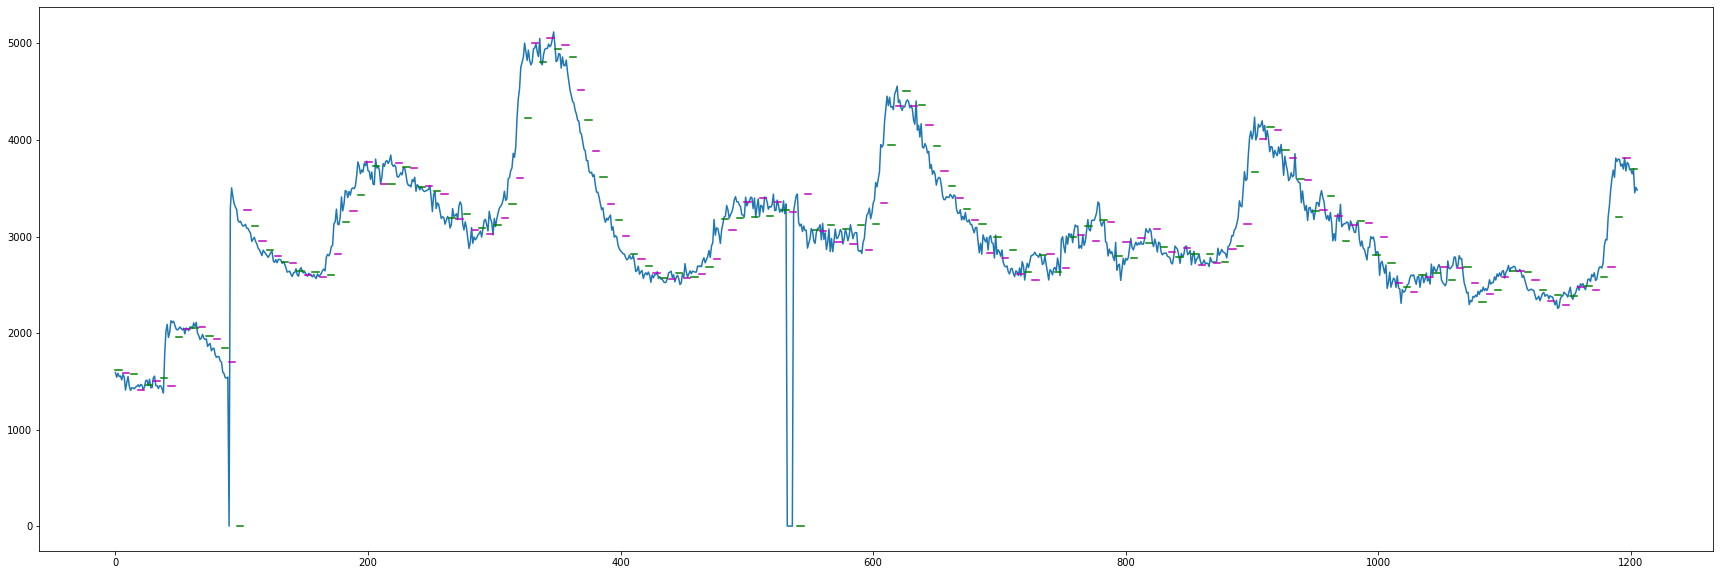

Test RMSE: 416.420
R2 score: 0.649


In [ ]:
# Defino como baseline un naive regressor que consiste en asignar a la predicción como el valor anterior
def naive_regressor(X,y,t_out):
    dimX1, dimX2 = X.shape[0], X.shape[1]
    dimy1, dimy2 = y.shape[0], y.shape[1]
    X_tr = scaler.inverse_transform(X)
    # ypred = np.array([])
    ynaive = X_tr[:,-32*t_out].reshape(dimy1,1)
    ypred = ynaive
    for i in range(1,dimy2):
        ypred = np.concatenate((ypred, ynaive), 1)
    return ypred

y_pred_naive = naive_regressor(X_test_sc,y_test,t_out)

from sklearn.metrics import mean_squared_error, r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred_naive))
r2sc = r2_score(y_test,y_pred_naive)
plot_forecasts(y_test,y_pred_naive,t_out)
print('Test RMSE: %.3f' % rmse)
print('R2 score: %.3f' % r2sc)

### SVR

In [ ]:
svr = MultiOutputRegressor(SVR()).fit(X_train_sc, y_train)
y_pred_svr = svr.predict(X_test_sc)

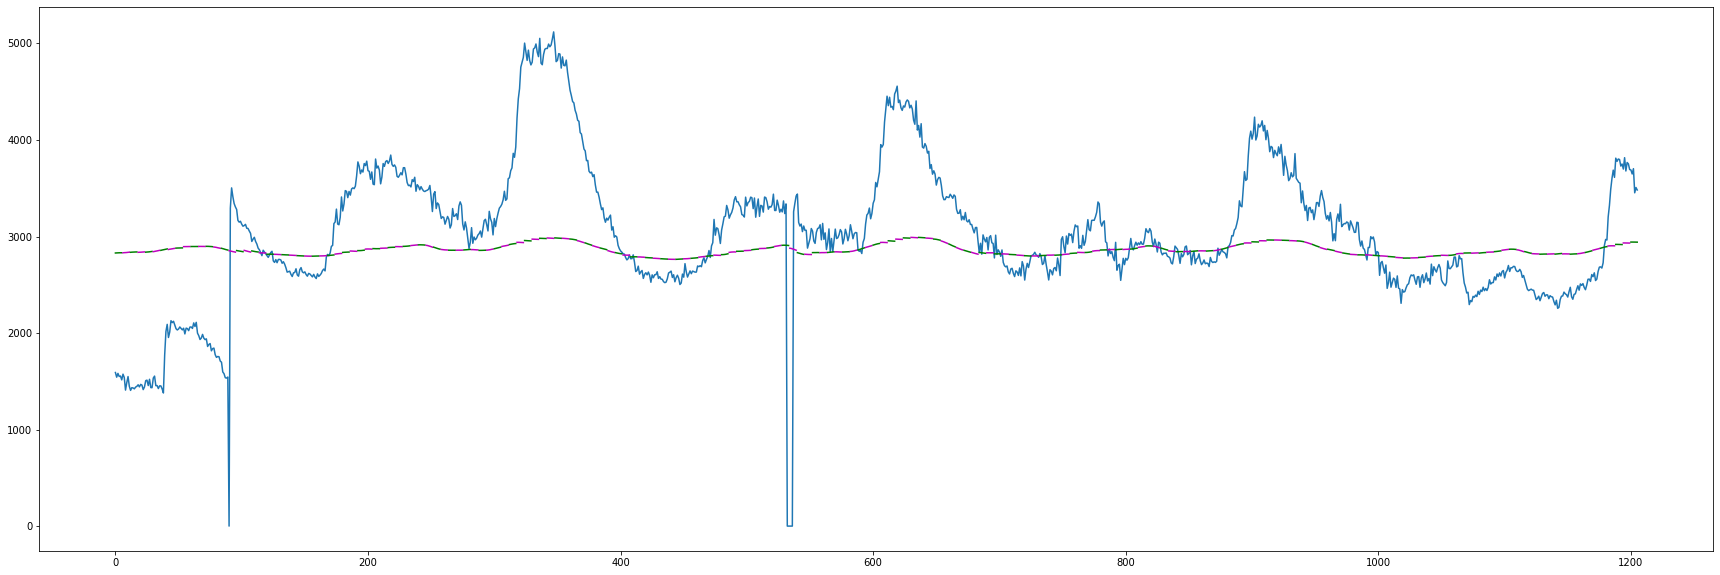

Test RMSE: 688.626
R^2 score: 0.041


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_svr))
plot_forecasts(y_test,y_pred_svr,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % svr.score(X_test_sc,y_test))

### LinearSVR

In [ ]:
lsvr = MultiOutputRegressor(LinearSVR()).fit(X_train_sc, y_train)
y_pred_lsvr = lsvr.predict(X_test_sc)

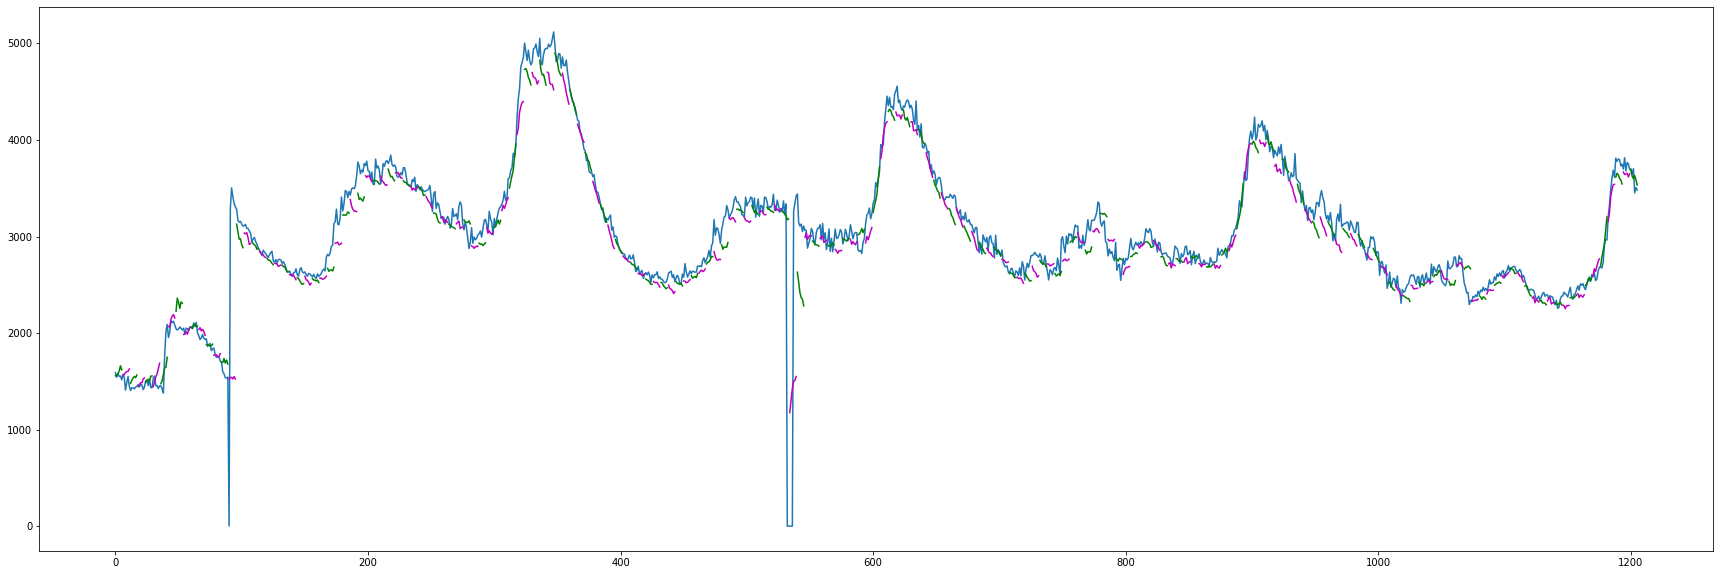

Test RMSE: 296.450
R^2 score: 0.822


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_lsvr))
plot_forecasts(y_test,y_pred_lsvr,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % lsvr.score(X_test_sc,y_test))

### Random Forest

In [ ]:
rfr = RandomForestRegressor(max_depth=30, random_state=0)
rfr.fit(X_train_sc, y_train)

y_pred_rfor = rfr.predict(X_test_sc)

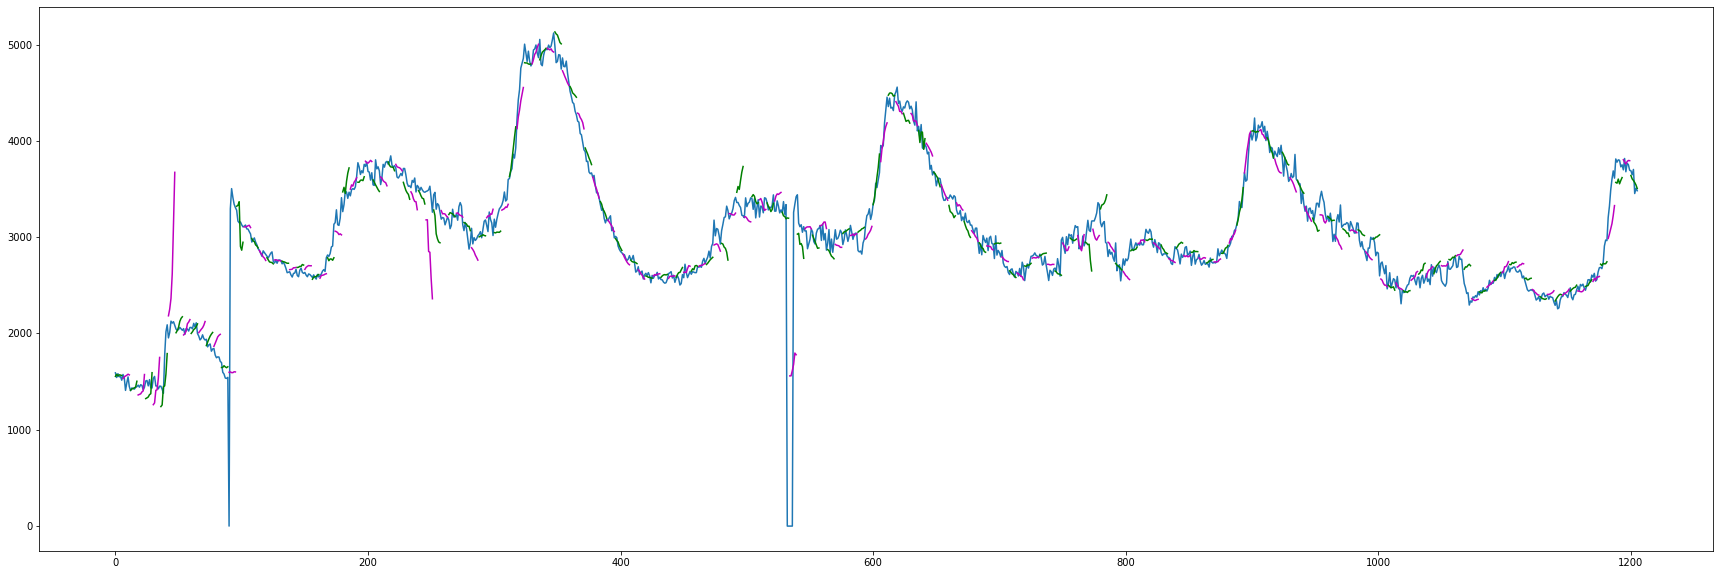

Test RMSE: 269.825
R^2 score: 0.853


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_rfor))
plot_forecasts(y_test,y_pred_rfor,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % rfr.score(X_test_sc,y_test))

### MLPR

In [ ]:
mlpr = MLPRegressor(random_state=0, max_iter = 10000).fit(X_train_sc, y_train)
y_pred_mlp = mlpr.predict(X_test_sc)

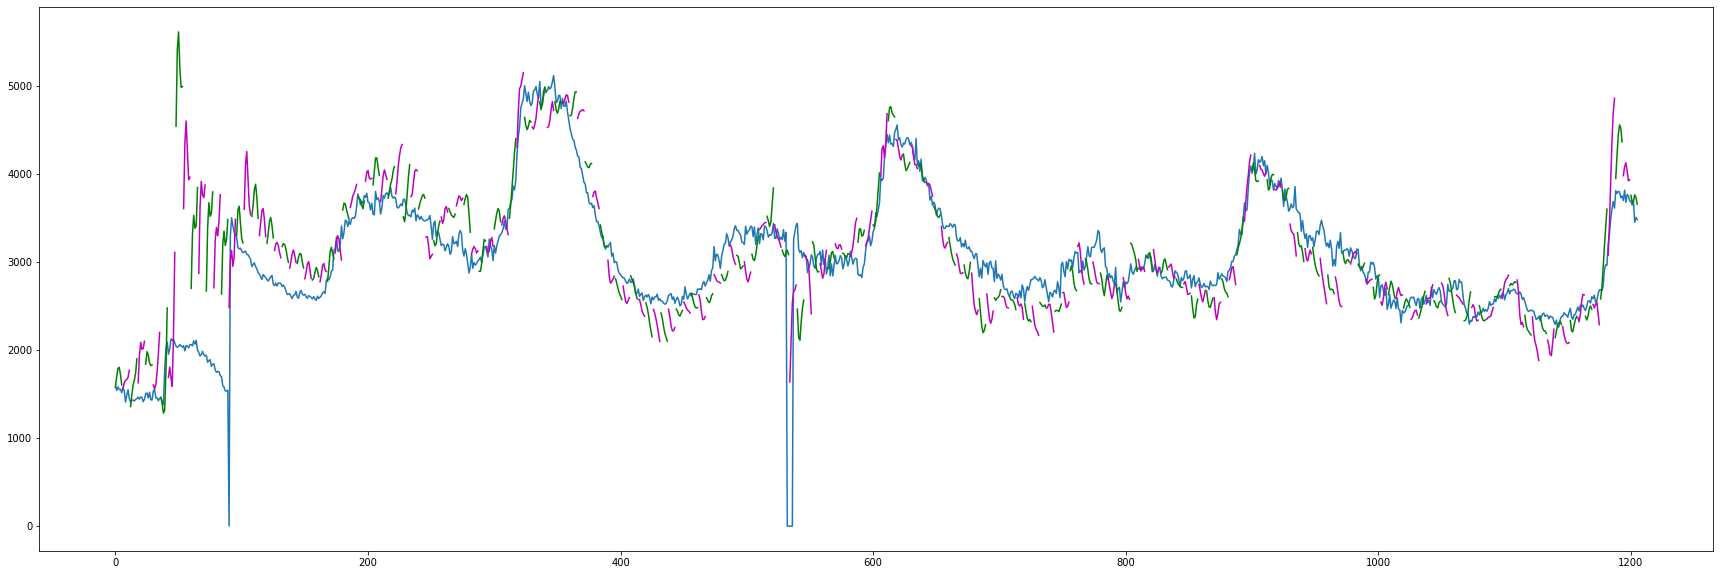

Test RMSE: 506.604
R^2 score: 0.481


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
# calculamos RMSE y graficamos
rmse = sqrt(mean_squared_error(y_test, y_pred_mlp))
plot_forecasts(y_test,y_pred_mlp,t_out)
print('Test RMSE: %.3f' % rmse)
print('R^2 score: %.3f' % mlpr.score(X_test_sc,y_test))

## VIII. Análisis de metricas
* a. Mean Absolute Error (MAE)
* b. Mean Squared Error (MSE)
* c. R2 Score
* d. Explained Variance Score

In [ ]:
metrics_labels = ['MAE_train','MAE_test','MSE_train','MSE_test', 'R2_train','R2_test','EVS_train','EVS_test']
metrics = [mean_absolute_error,mean_squared_error,r2_score,explained_variance_score]
models_labels = ['NR','SVR','LSVR','RFR','MLPR']
models = ['naive',svr,lsvr,rfr,mlpr]

tmp = []
met_list = []
for mod in models:
    if mod == 'naive':
        yhat_test= naive_regressor(X_test_sc,y_test,t_out)
        yhat_train = naive_regressor(X_train_sc,y_train,t_out)
        for met in metrics:
            tmp.append(met(y_train,yhat_train))
            tmp.append(met(y_test,yhat_test))
        zipbObj = zip(metrics_labels, tmp)
        met_list.append(dict(zipbObj))
        tmp=[]
    else: 
        yhat_test = mod.predict(X_test_sc)
        yhat_train = mod.predict(X_train_sc)
        for met in metrics:
            tmp.append(met(y_train,yhat_train))
            tmp.append(met(y_test,yhat_test))
        zipbObj = zip(metrics_labels, tmp)
        met_list.append(dict(zipbObj))
        tmp=[]
metrics_dataframe = pd.DataFrame(met_list)
metrics_dataframe['Model'] = models_labels
metrics_dataframe.set_index('Model', inplace = True)

In [ ]:
print('Tabla comparativa entre métricas para los modelos propuestos:\n')
display(metrics_dataframe)

Tabla comparativa entre métricas para los modelos propuestos:



,MAE_train,MAE_test,MSE_train,MSE_test,R2_train,R2_test,EVS_train,EVS_test
Model,,,,,,,,
NR,215.67,208.38,210263.98,173405.58,0.63,0.65,0.63,0.65
SVR,504.31,487.48,509173.41,474206.23,0.10,0.04,0.13,0.09
LSVR,120.79,132.55,89778.34,87882.39,0.84,0.82,0.85,0.83
RFR,28.64,121.02,4361.93,72805.40,0.99,0.85,0.99,0.85
MLPR,39.47,305.84,5982.96,256647.56,0.99,0.48,0.99,0.49


Se observa que a mayor cantidad de predicciones el modelo naive empieza a tener menos score en R2 comparado a los modelos de LSVR o RFR. 
Además falta analizar los ajuste de los hiperparámetros o utilizar mejores clasificadores para el caso de trabajo con series tenporales.

https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/